# Notes

- Experimented Modelling with Keras, quite simple to apply
- Interesting visualizations due to the class nature, specially with kde plots
- Explored spatial and temporal nature of the data with Convolutional+LSTM Neural Network combination Model
- Compared resulting metrics against a neural network and a simple linear regression, best results obtained on CNN+LSTM model
- Visualized loss over epochs using history function from keras

<b> Comments <b>
- Main hardship was the split in the dataset, initially was using train_test_split from sklearn but after better look at the data an interval was detected and decided to split the data on it (using one part for train and the other for evaluation) preserving the sequential nature of each split

# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
room_occupancy_estimation = fetch_ucirepo(id=864) 
  
# data (as pandas dataframes) 
X = room_occupancy_estimation.data.features 
y = room_occupancy_estimation.data.targets 

In [3]:
room_occupancy_estimation.metadata

{'uci_id': 864,
 'name': 'Room Occupancy Estimation',
 'repository_url': 'https://archive.ics.uci.edu/dataset/864/room+occupancy+estimation',
 'data_url': 'https://archive.ics.uci.edu/static/public/864/data.csv',
 'abstract': 'Data set for estimating the precise number of occupants in a room using multiple non-intrusive environmental sensors like temperature, light, sound, CO2 and PIR.',
 'area': 'Computer Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate', 'Time-Series'],
 'num_instances': 10129,
 'num_features': 18,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['Room_Occupancy_Count'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2018,
 'last_updated': 'Wed Aug 16 2023',
 'dataset_doi': '10.24432/C5P605',
 'creators': ['Adarsh Pal Singh', 'Sachin Chaudhari'],
 'intro_paper': {'ID': 275,
  'type': 'NATIVE',
  'title': 'Machine Learning-Based Occupancy Estimation Using Multivari

In [4]:
room_occupancy_estimation.variables

,name,role,type,demographic,description,units,missing_values
0,Date,Feature,Date,None,None,YYYY/MM/DD,no
1,Time,Feature,Date,None,None,HH:MM:SS,no
2,S1_Temp,Feature,Continuous,None,None,C,no
3,S2_Temp,Feature,Continuous,None,None,C,no
4,S3_Temp,Feature,Continuous,None,None,C,no
5,S4_Temp,Feature,Continuous,None,None,C,no
6,S1_Light,Feature,Integer,None,None,Lux,no
7,S2_Light,Feature,Integer,None,None,Lux,no
8,S3_Light,Feature,Integer,None,None,Lux,no
9,S4_Light,Feature,Integer,None,None,Lux,no


In [5]:
data = pd.concat((X,y), axis=1)

# EDA

In [6]:
data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [7]:
data["Date"].value_counts()

Date
2017/12/23    2779
2017/12/25    1716
2017/12/22    1462
2017/12/24    1064
2017/12/26    1063
2018/01/11    1048
2018/01/10     997
Name: count, dtype: int64

For sequential data modelling we might prefer to split the data across the continuity of dates, such as Train on data from 2017/12/22 to 2017/12/26.
Test on data from 2018/01/10 to 2018/01/11.

In [8]:
data.duplicated().sum()

0

In [9]:
data["Room_Occupancy_Count"].value_counts()

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [11]:
data_numeric = data.select_dtypes(include="number")

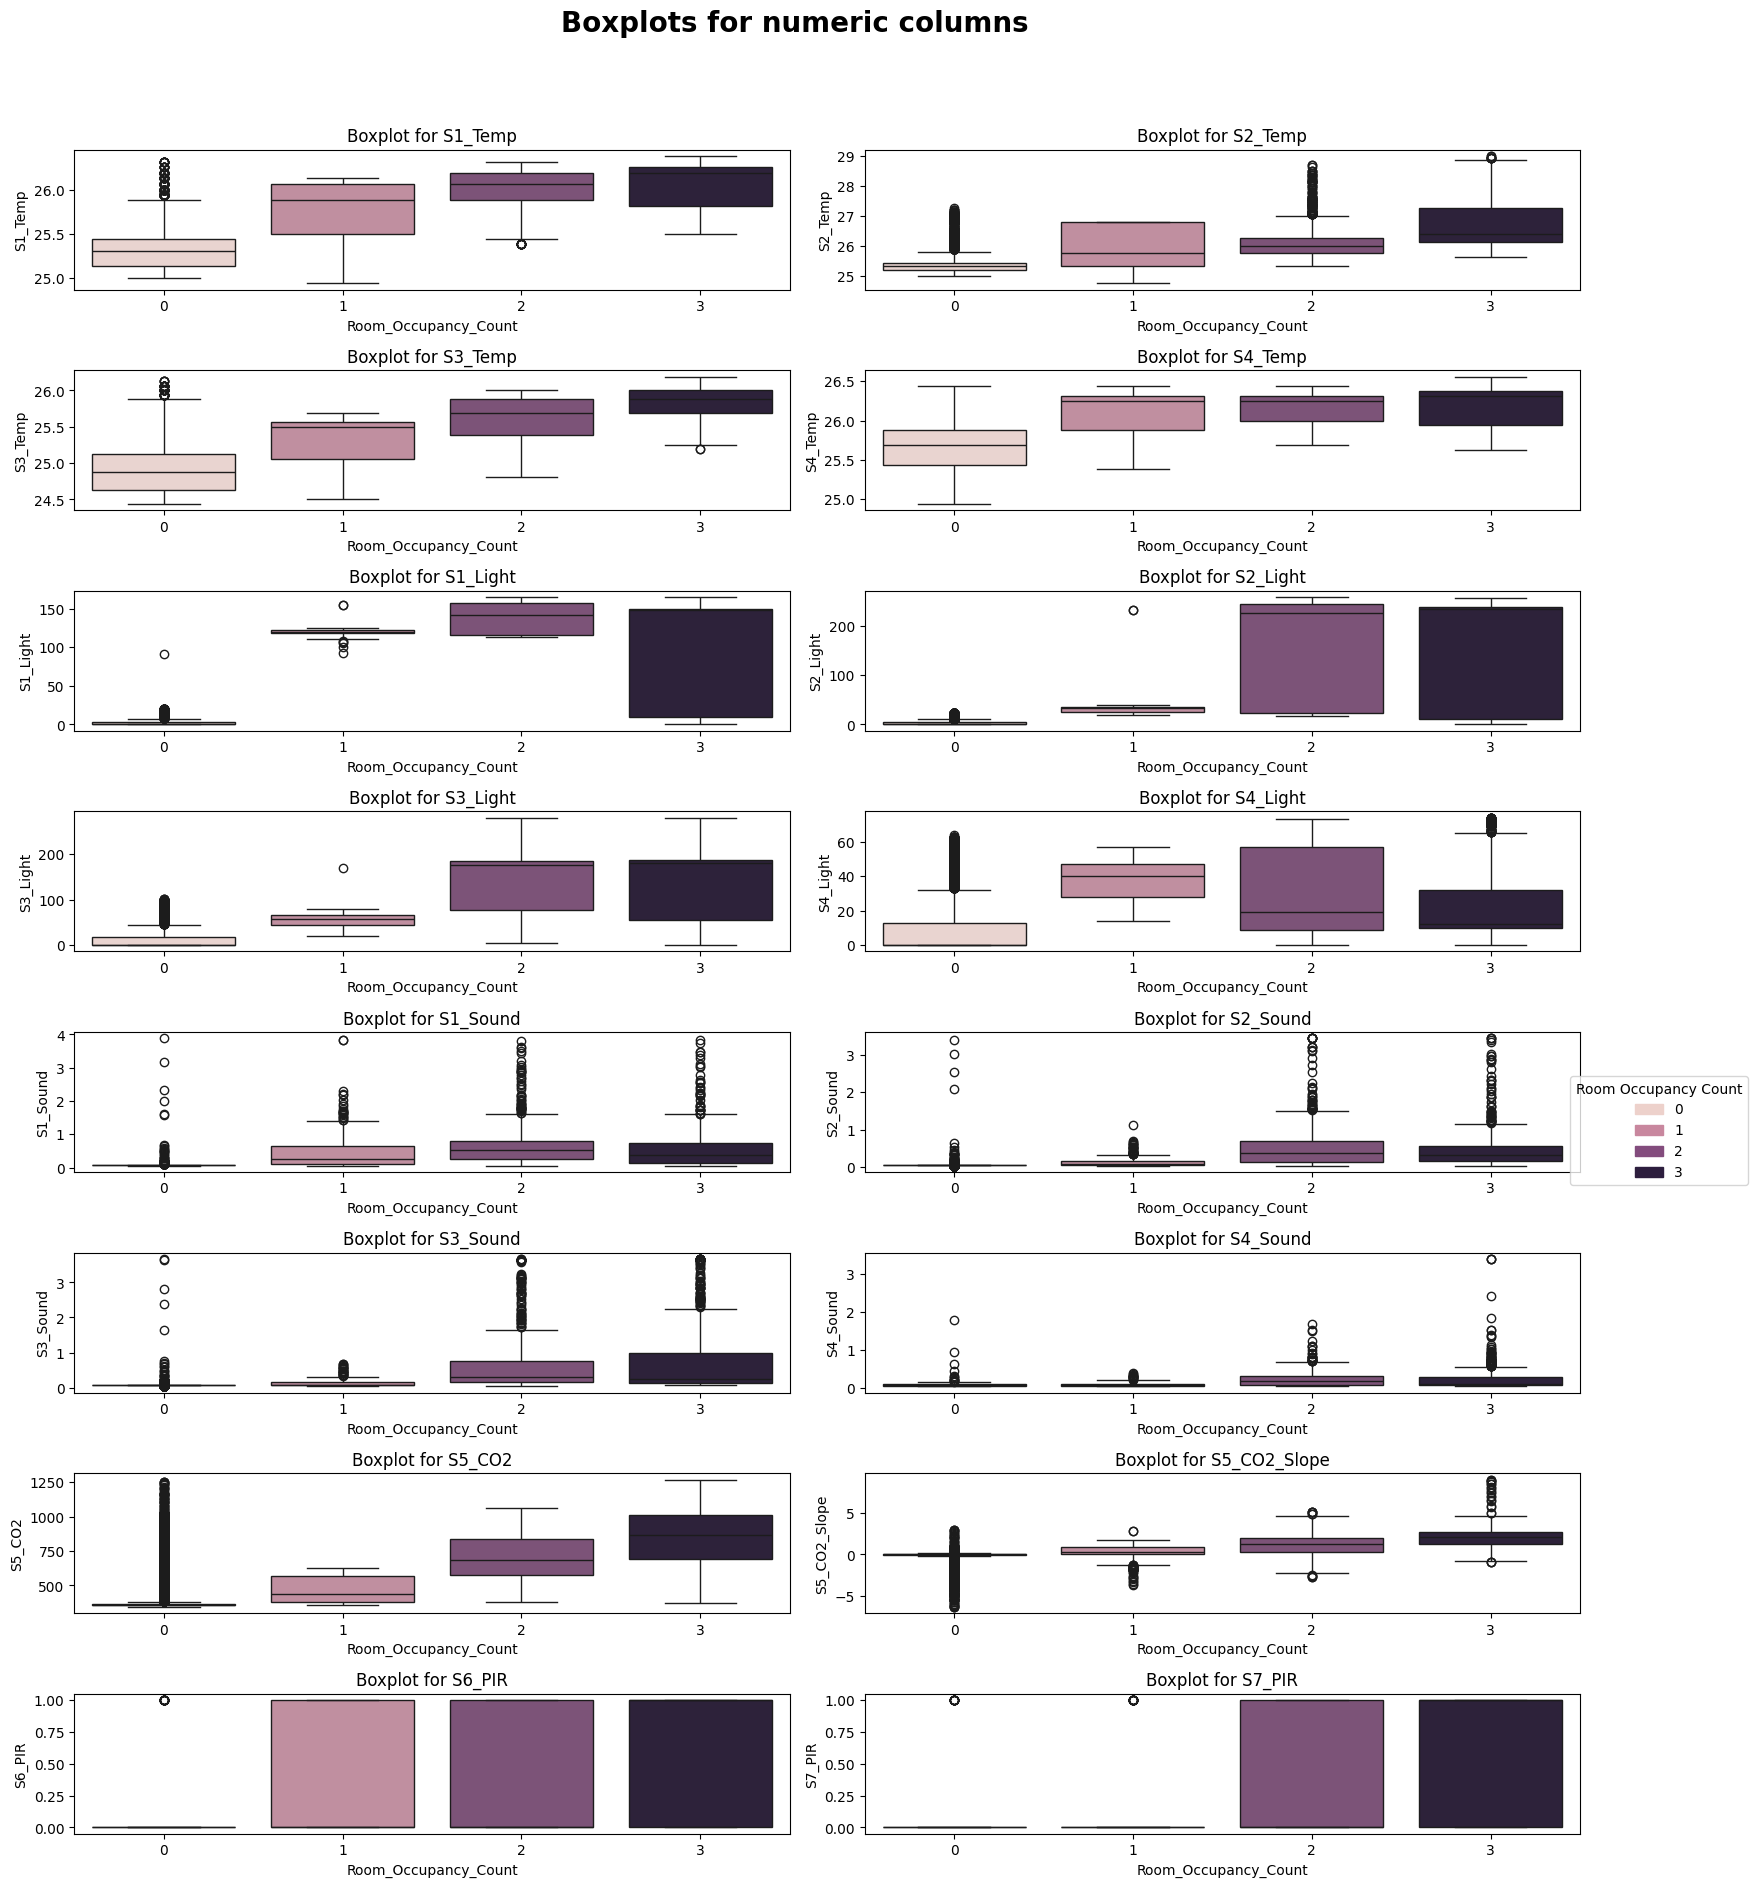

In [12]:
sns.cubehelix_palette(n_colors=4)
colors = list(sns.cubehelix_palette(n_colors=4))

target_mapping = {
    0: colors[0],
    1: colors[1],
    2: colors[2],
    3: colors[3]
}

fig, axes = plt.subplots(9,2, figsize = (16,20), tight_layout = True)
axes = axes.flatten()

for col, ax in zip(data_numeric.drop(columns = "Room_Occupancy_Count"),axes):
    g = sns.boxplot(y = data_numeric[col], x = data_numeric["Room_Occupancy_Count"], hue = data_numeric["Room_Occupancy_Count"], palette = target_mapping, ax = ax, legend = False)
    g.set_title(f"Boxplot for {col}")
    
handles = list(target_mapping.keys())
color_mappings = list(target_mapping.values())

import matplotlib.patches as mpatches

handles = [mpatches.Patch(color=color, label=label) for label, color in target_mapping.items()]
fig.legend(
    handles=handles,
    loc='upper right',
    title="Room Occupancy Count",
    bbox_to_anchor=(1.1, 0.5), 
    frameon=True
)

[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

plt.suptitle("Boxplots for numeric columns", fontweight = "bold", fontsize = 20, y = 1.03)
plt.show()

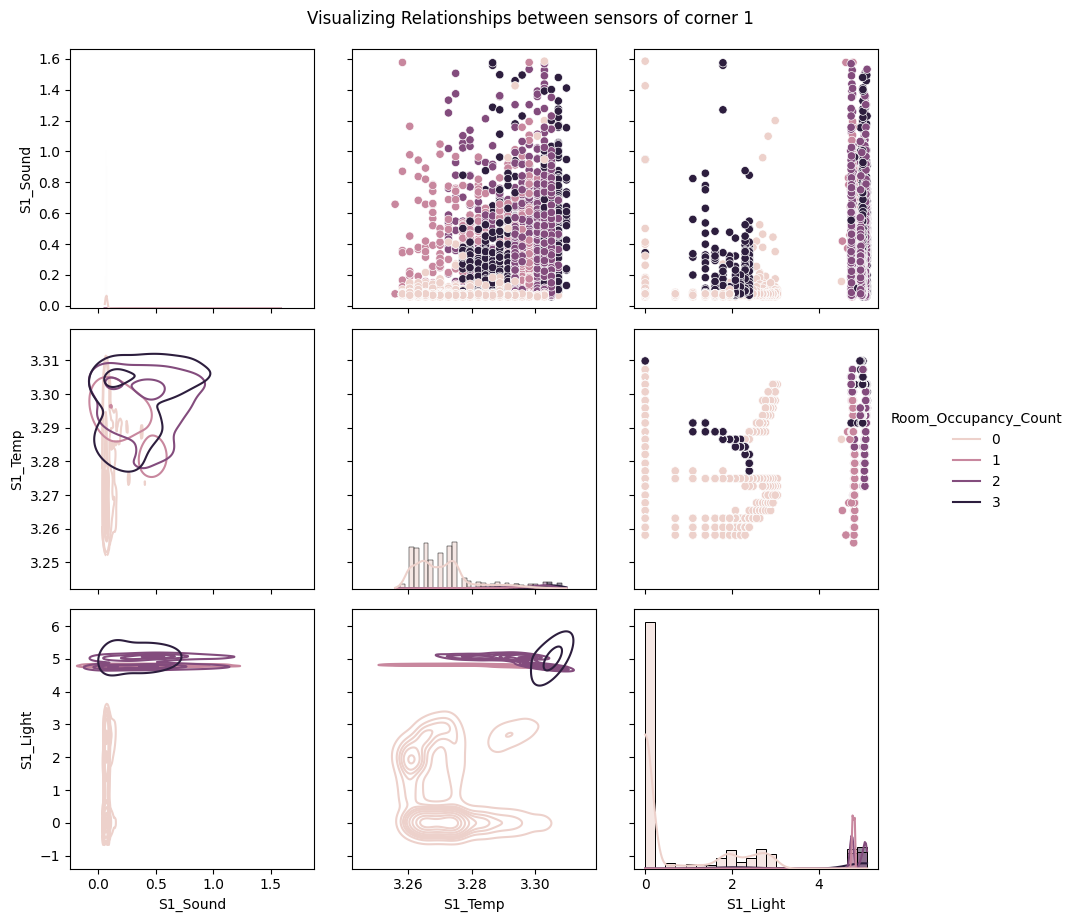

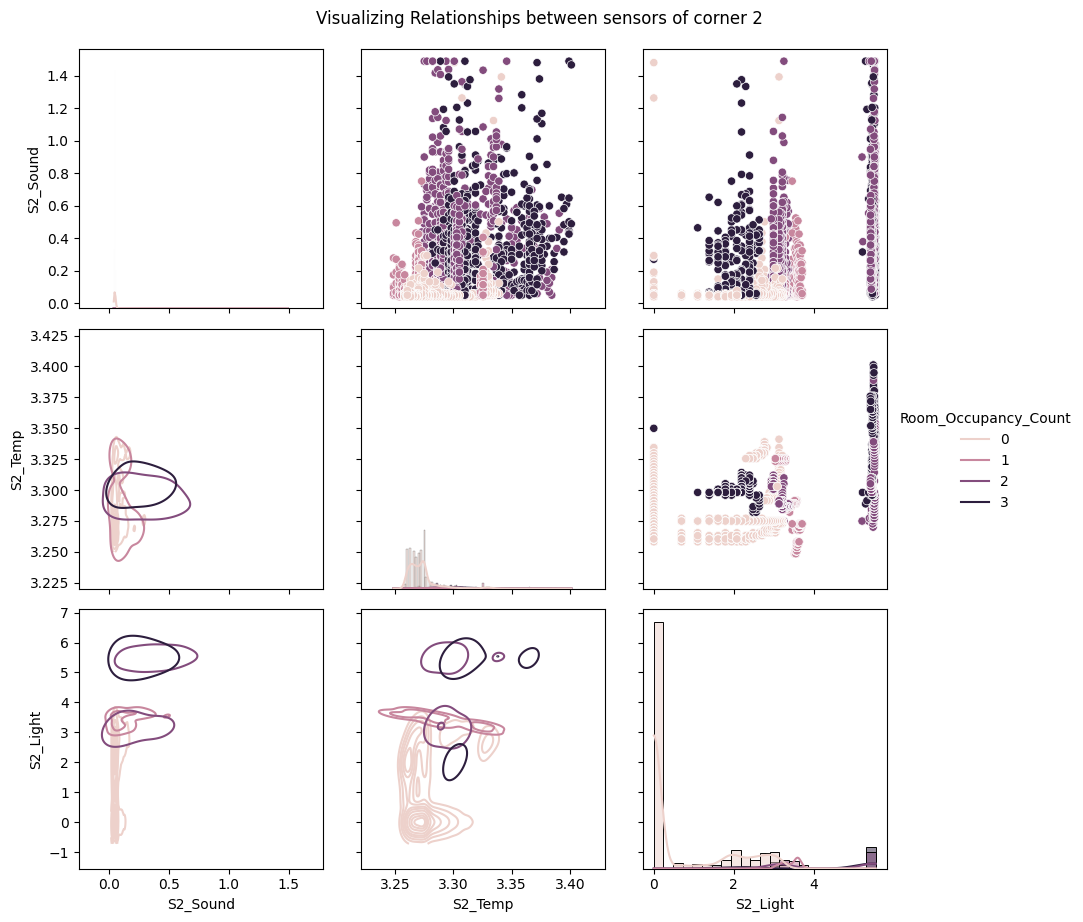

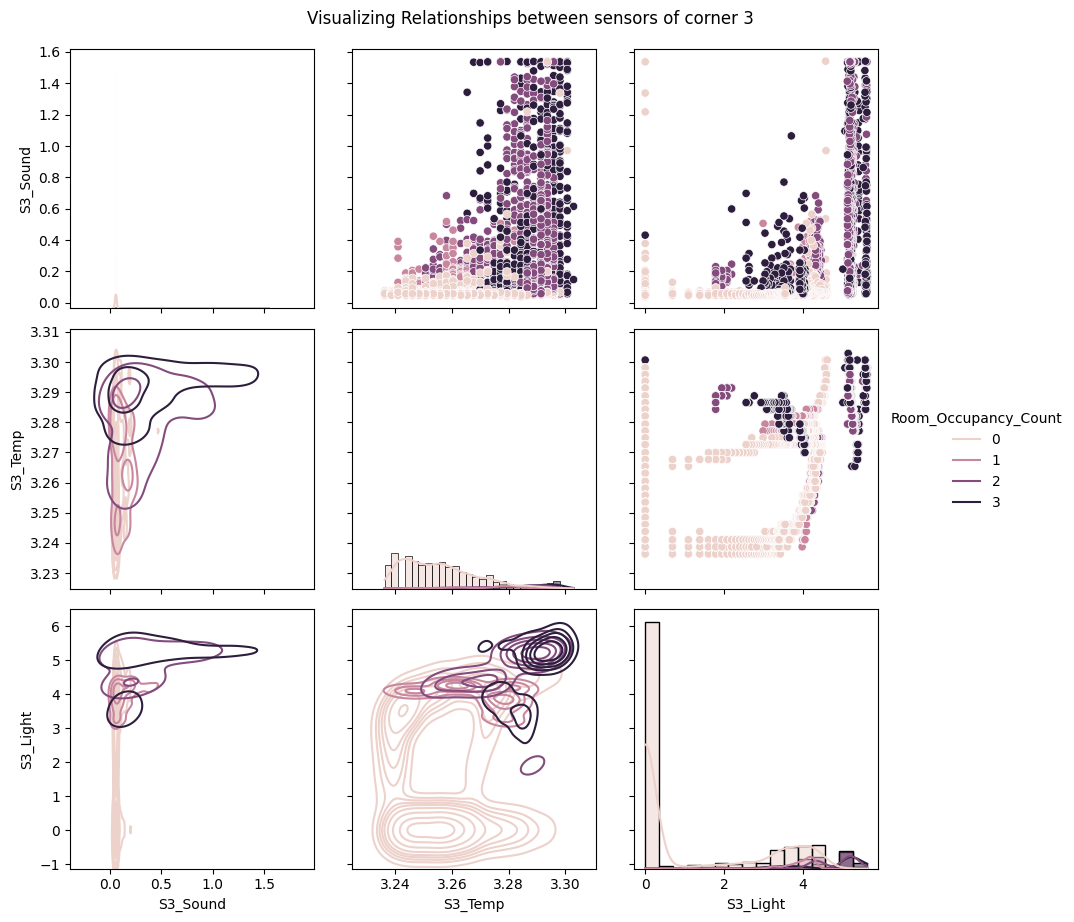

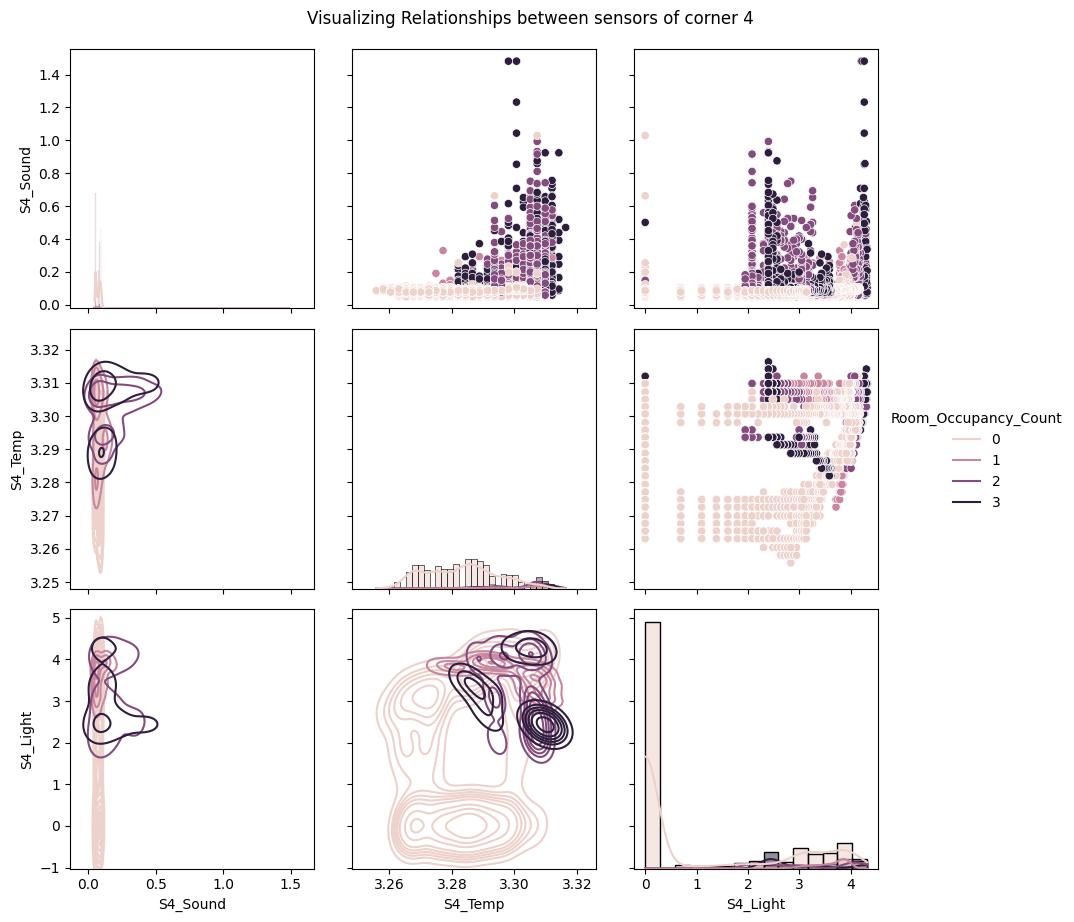

In [13]:
for i in range(1, 5): 
    subset = np.log1p(data[[f"S{i}_Sound", f"S{i}_Temp", f"S{i}_Light"]])
    subset["Room_Occupancy_Count"] = data["Room_Occupancy_Count"]
    
    g = sns.PairGrid(data=subset, hue="Room_Occupancy_Count", height=3, despine=False)
    
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot, fill=False)
    g.map_diag(sns.histplot, kde=True)
    
    g.fig.suptitle(f"Visualizing Relationships between sensors of corner {i}", y=1.02)
    g.add_legend()

plt.show()

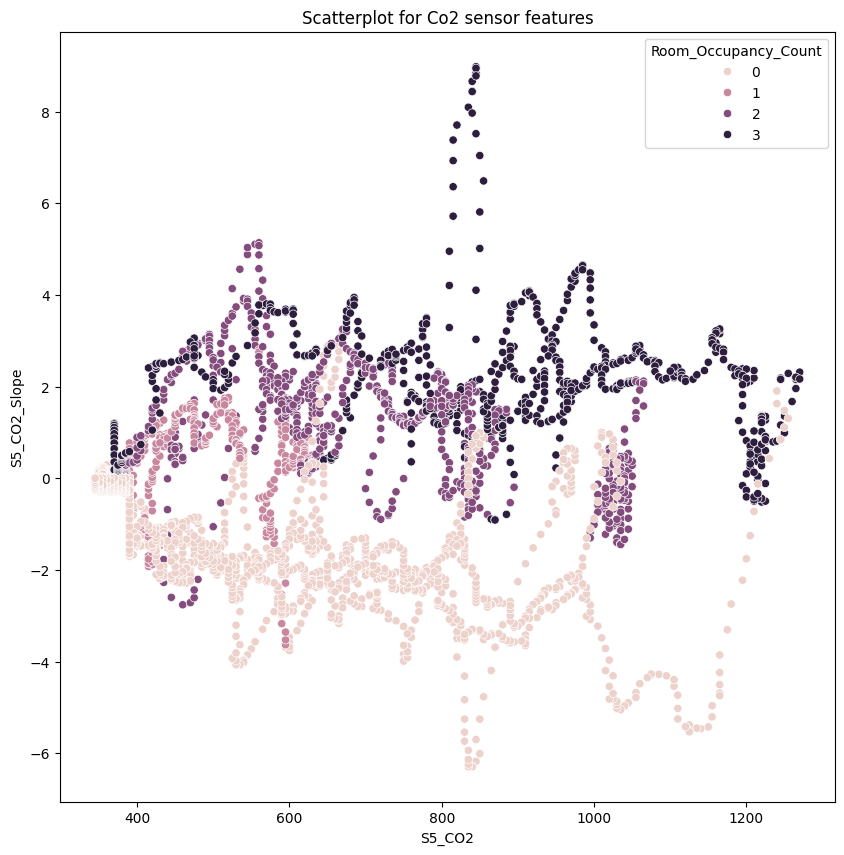

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data, x = "S5_CO2", y= "S5_CO2_Slope", hue = "Room_Occupancy_Count")
plt.title("Scatterplot for Co2 sensor features")
plt.show()

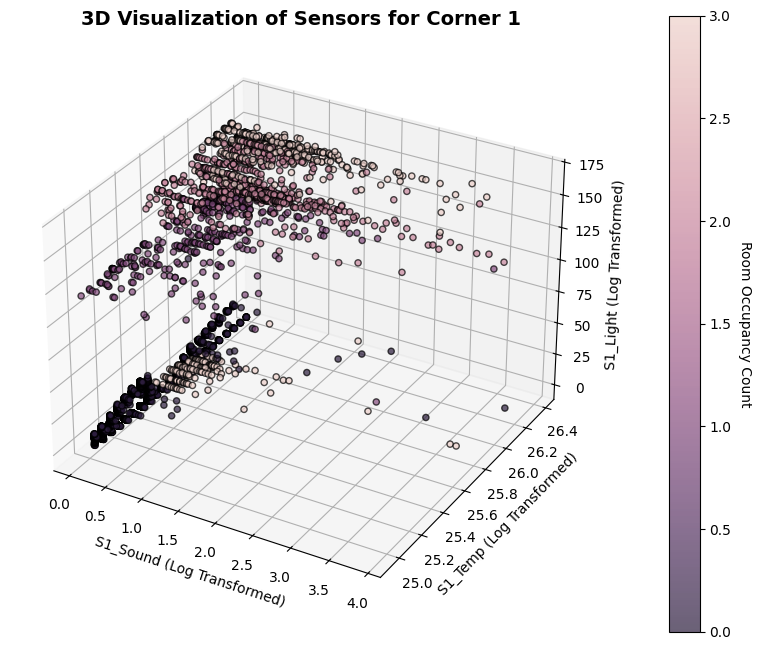

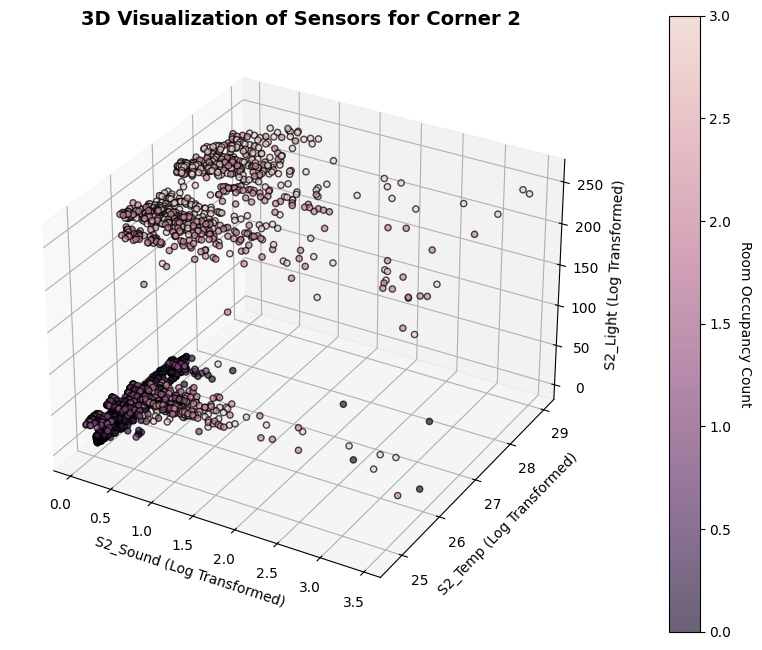

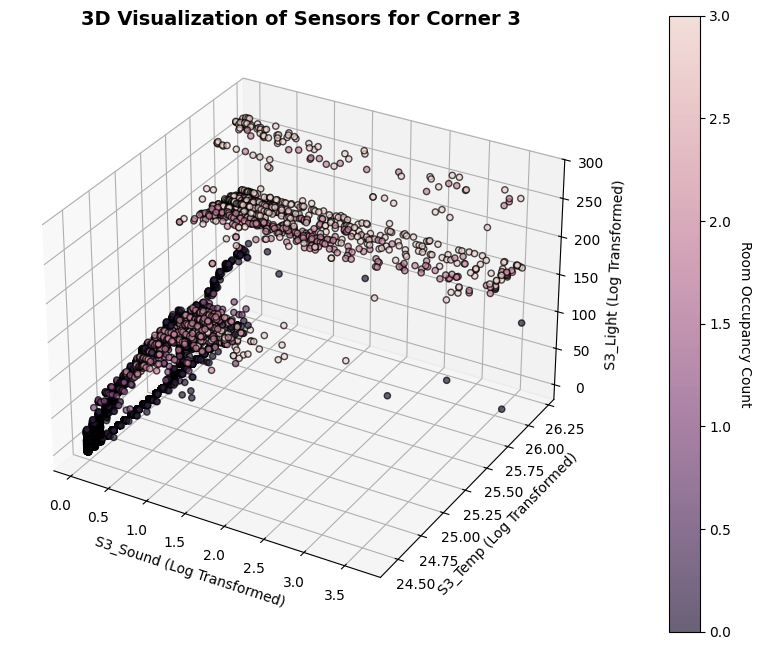

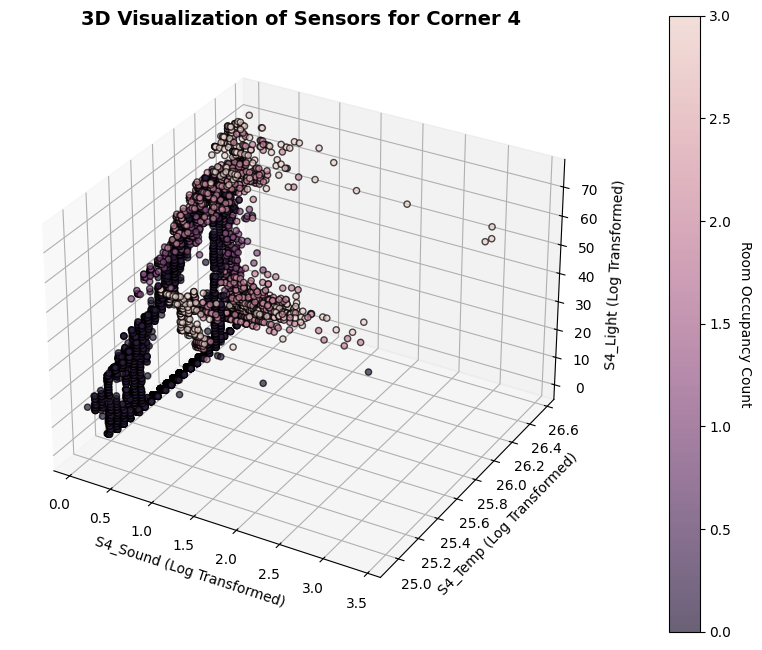

In [15]:
from mpl_toolkits.mplot3d import Axes3D

cmap = sns.cubehelix_palette(n_colors=4, as_cmap=True, reverse=True)


for i in range(1, 5):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    x = data[f"S{i}_Sound"]
    y = data[f"S{i}_Temp"]
    z = data[f"S{i}_Light"]
    c = data["Room_Occupancy_Count"]
    

    scatter = ax.scatter(
        x, y, z, c=c, cmap=cmap, s=20, alpha=0.7, edgecolor='k'
    )
    
    # Set axis labels and title
    ax.set_xlabel(f"S{i}_Sound (Log Transformed)")
    ax.set_ylabel(f"S{i}_Temp (Log Transformed)")
    ax.set_zlabel(f"S{i}_Light (Log Transformed)")
    ax.set_title(f"3D Visualization of Sensors for Corner {i}", fontsize=14, fontweight='bold')
    
    # Add a color bar to indicate Room Occupancy Count
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
    cbar.set_label('Room Occupancy Count', rotation=270, labelpad=15)
    
    plt.show()


In [16]:
data["Datetime"] = pd.to_datetime(data["Date"] + " " + data["Time"]) #getting a date time column, more granular than just date
data = data.set_index("Datetime")

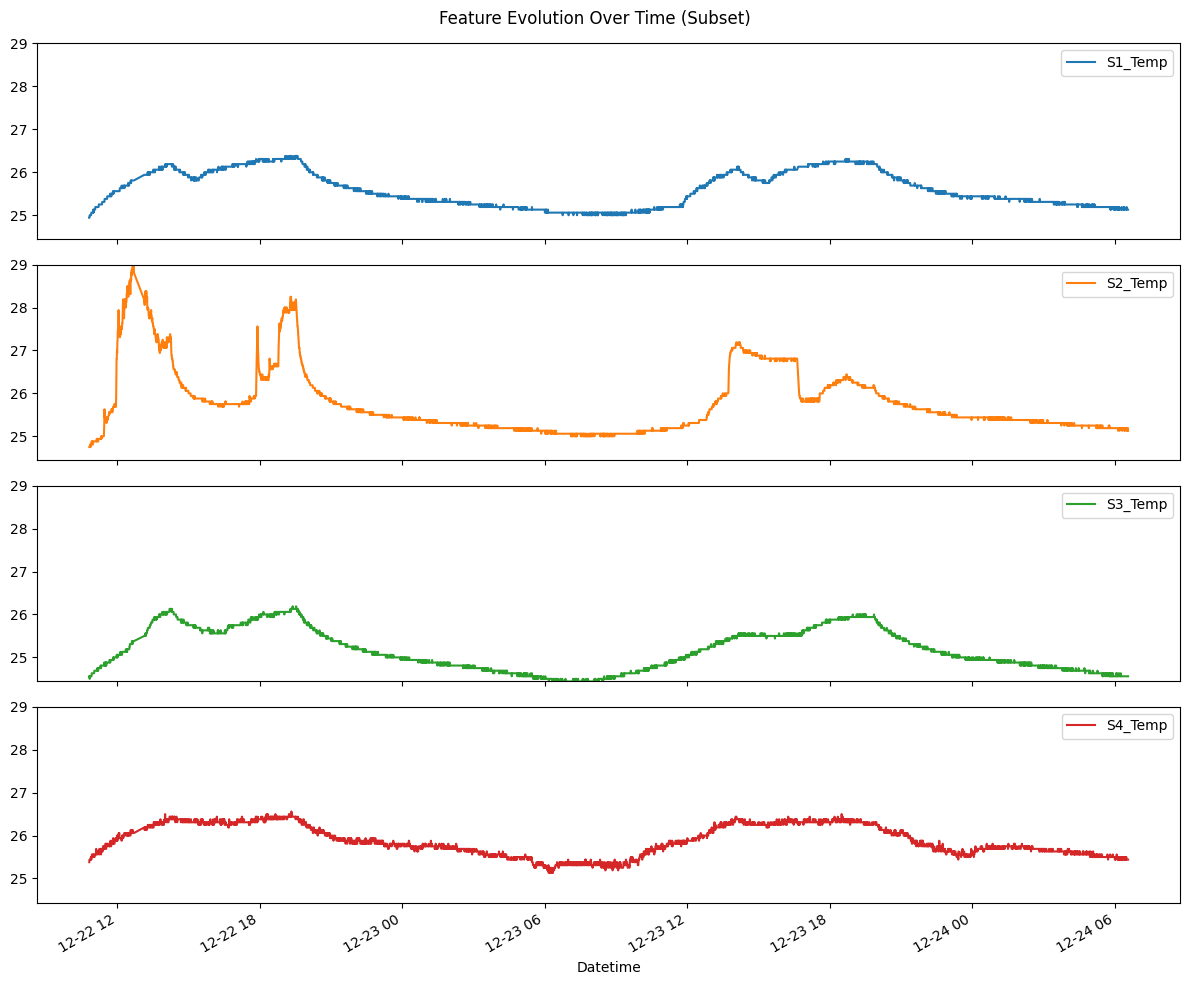

In [17]:
plot_cols = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']
plot_features = data[plot_cols]

plot_features_subset = plot_features.iloc[:5000]

y_min, y_max = plot_features_subset.min().min(), plot_features_subset.max().max()

axes = plot_features_subset.plot(subplots=True, figsize=(12, 10), title="Feature Evolution Over Time (Subset)")

# Set the same y-axis limits for each subplot
for ax in axes:
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

There is a big gap in the data

In [18]:
data.select_dtypes(include="number").skew()

S1_Temp                  0.953613
S2_Temp                  2.355681
S3_Temp                  0.650162
S4_Temp                  0.129630
S1_Light                 1.820428
S2_Light                 2.827817
S3_Light                 2.100069
S4_Light                 1.357618
S1_Sound                 5.450448
S2_Sound                 6.881610
S3_Sound                 5.994767
S4_Sound                10.952134
S5_CO2                   1.975692
S5_CO2_Slope             0.287967
S6_PIR                   2.862811
S7_PIR                   3.107460
Room_Occupancy_Count     2.057635
dtype: float64

In [19]:
numerical_columns = data.select_dtypes(include="number").columns.drop("Room_Occupancy_Count")

data[numerical_columns] = data[numerical_columns].map(
    lambda x: np.log1p(x) if x > 0 else x)

# Feature Selection

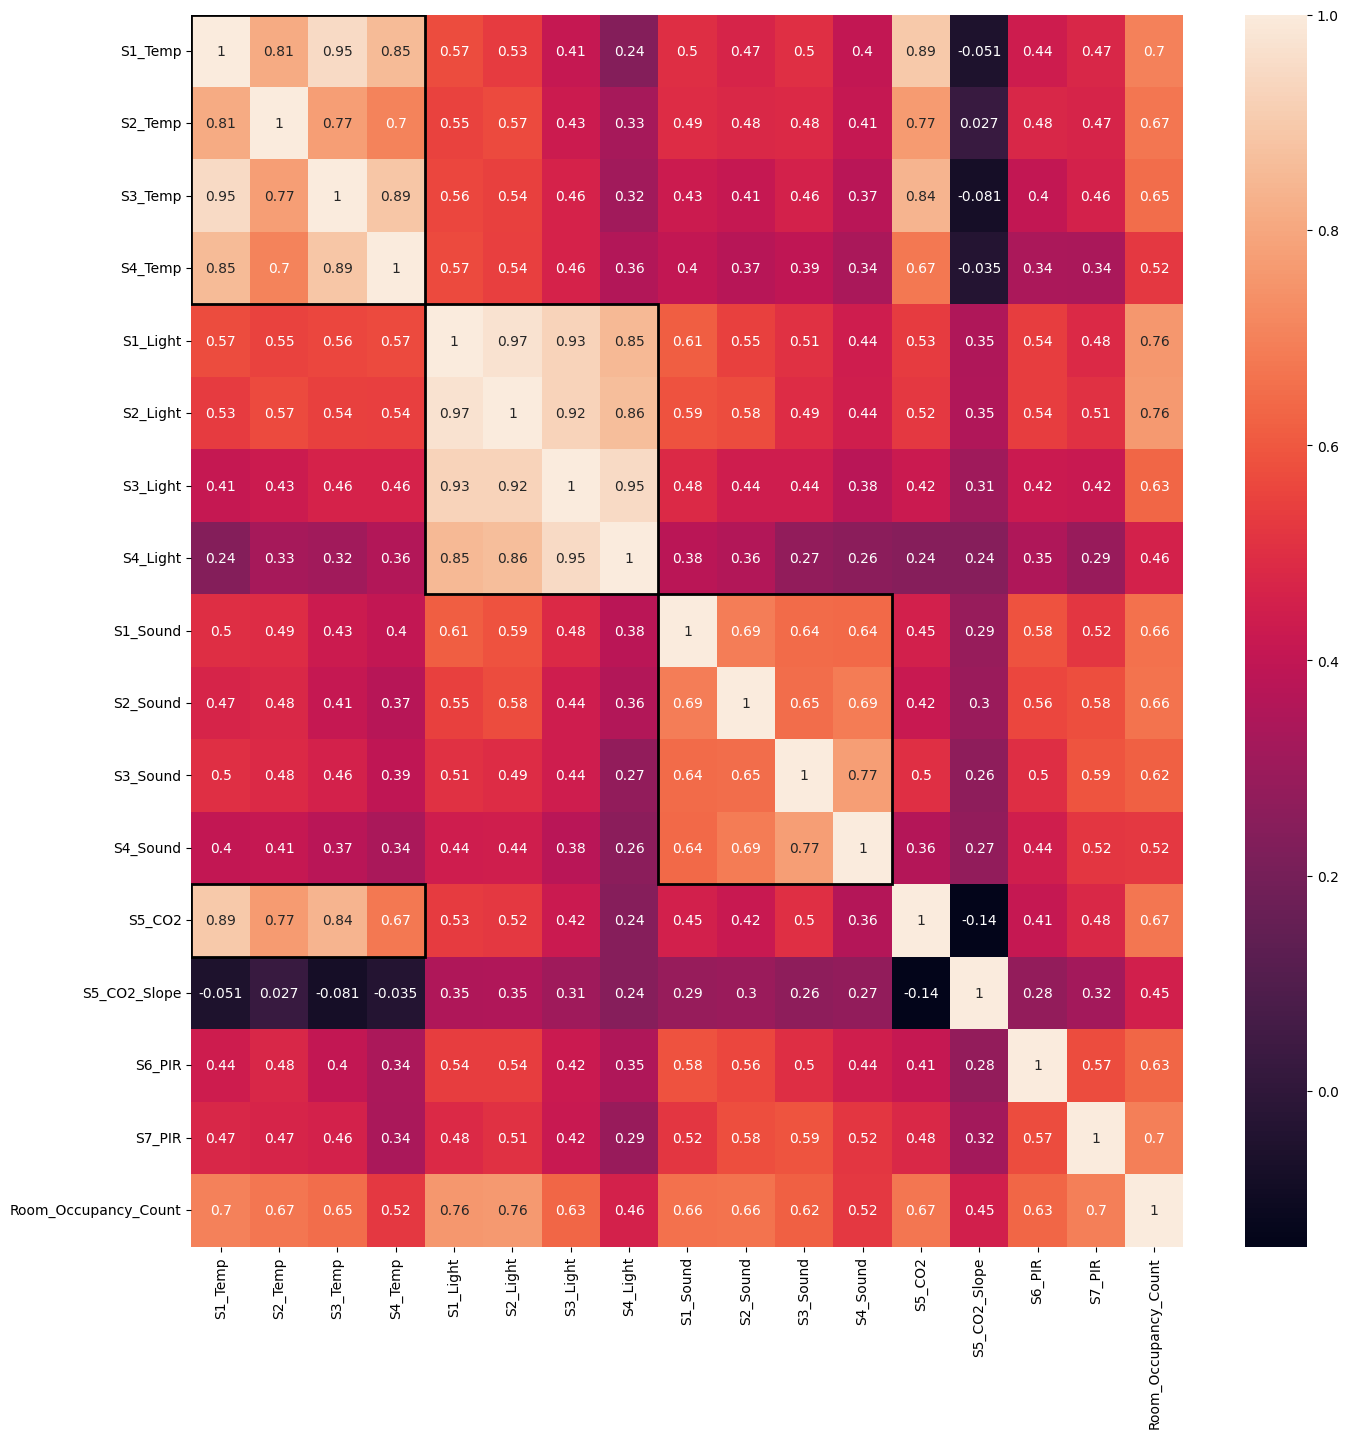

In [20]:
import matplotlib.patches as patches

plt.figure(figsize=(16,16))
g = sns.heatmap(data.corr(numeric_only = True), annot= True)

rect1 = patches.Rectangle((0, 0), 4, 4, linewidth=2, edgecolor='black', facecolor='none')
rect2 = patches.Rectangle((4, 4), 4, 4, linewidth=2, edgecolor='black', facecolor='none')
rect3 = patches.Rectangle((8, 8), 4, 4, linewidth=2, edgecolor='black', facecolor='none')
rect4 = patches.Rectangle((0, 12), 4, 1, linewidth=2, edgecolor='black', facecolor='none')

g.add_patch(rect1)
g.add_patch(rect2)
g.add_patch(rect3)
g.add_patch(rect4)
plt.show()

Every Feature in this dataset displays considerable correlation with the target variable. With possible it would be benefitial to use a model which takes advantage of most of them if not all

# Splitting Data

In [21]:
data.drop(columns = ["Date", "Time"], inplace = True)

In [22]:
X = data.iloc[:,:-1]

In [23]:
y = data.iloc[:,-1]

In [24]:
y.shape

(10129,)

Remove below cell if needed for sequential models

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, shuffle=True)

# Modelling simple Dense NN

In [39]:
train_cutoff = '2017-12-26 23:59:59'  
test_start = '2018-01-10 00:00:00'    

# Ensure the index is datetime
X.index = pd.to_datetime(X.index)
y.index = pd.to_datetime(y.index)

# Split into train and test
X_train_sq = X[X.index <= train_cutoff]
y_train_sq = y[y.index <= train_cutoff]

X_test_sq = X[X.index >= test_start]
y_test_sq = y[y.index >= test_start]

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import categorical_crossentropy
from keras.layers import Input, Dense

In [51]:
X_train_tensor = tf.convert_to_tensor(X_train_sq) #changed everything from X_train,X_test,y_train,y_test to the sq counterpart
y_train_tensor = tf.convert_to_tensor(y_train_sq)
X_test_tensor = tf.convert_to_tensor(X_test_sq)
y_test_tensor = tf.convert_to_tensor(y_test_sq)

In [52]:
from keras.utils import to_categorical

y_train_tensor = to_categorical(y_train_tensor, num_classes=4)
y_test_tensor = to_categorical(y_test_tensor, num_classes=4)

In [53]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(32, activation="relu"))  # Hidden layer
model.add(Dense(16, activation="relu"))  # Hidden layer
model.add(Dense(8, activation="relu"))
model.add(Dense(1))  # Output layer for regression (single value)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(
    optimizer=Adam(learning_rate = 0.00001),
    loss='mse',
    metrics=["root_mean_squared_error"]
)

In [55]:
history = model.fit(
    x=X_train_tensor,
    y=y_train_tensor,
    batch_size=32,
    epochs=100,
    shuffle=True,
    verbose=2,
    validation_data=(X_test_tensor, y_test_tensor),
)

Epoch 1/30
253/253 - 1s - 6ms/step - loss: 3.3957 - root_mean_squared_error: 1.8427 - val_loss: 2.9254 - val_root_mean_squared_error: 1.7104
Epoch 2/30
253/253 - 0s - 2ms/step - loss: 2.5022 - root_mean_squared_error: 1.5818 - val_loss: 2.2398 - val_root_mean_squared_error: 1.4966
Epoch 3/30
253/253 - 1s - 2ms/step - loss: 1.8732 - root_mean_squared_error: 1.3687 - val_loss: 1.7456 - val_root_mean_squared_error: 1.3212
Epoch 4/30
253/253 - 0s - 2ms/step - loss: 1.4344 - root_mean_squared_error: 1.1977 - val_loss: 1.3780 - val_root_mean_squared_error: 1.1739
Epoch 5/30
253/253 - 0s - 2ms/step - loss: 1.1267 - root_mean_squared_error: 1.0614 - val_loss: 1.1044 - val_root_mean_squared_error: 1.0509
Epoch 6/30
253/253 - 0s - 2ms/step - loss: 0.9060 - root_mean_squared_error: 0.9518 - val_loss: 0.8977 - val_root_mean_squared_error: 0.9475
Epoch 7/30
253/253 - 0s - 2ms/step - loss: 0.7441 - root_mean_squared_error: 0.8626 - val_loss: 0.7397 - val_root_mean_squared_error: 0.8600
Epoch 8/30
25

In [32]:
predictions = model.predict(X_test_tensor)
rounded_predictions = np.round(predictions) 

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


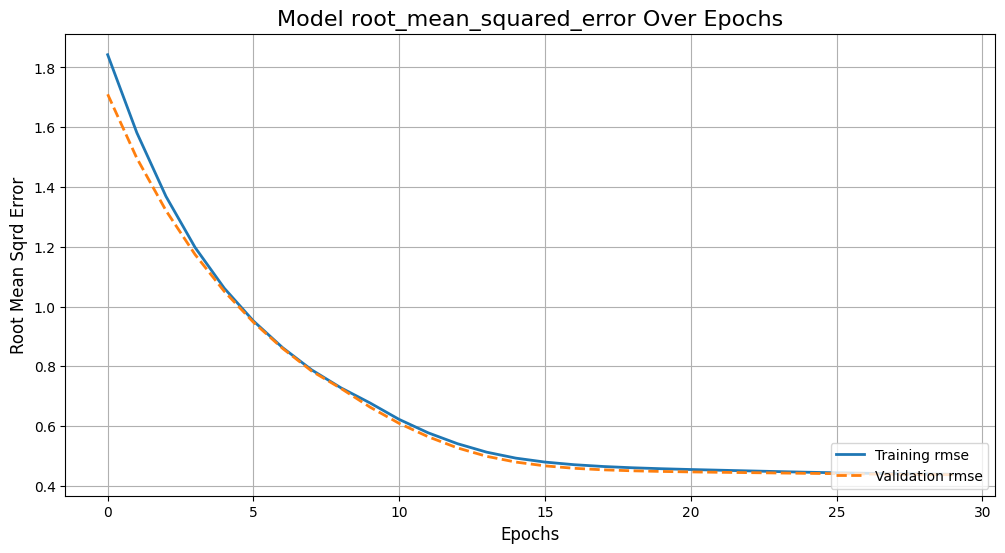

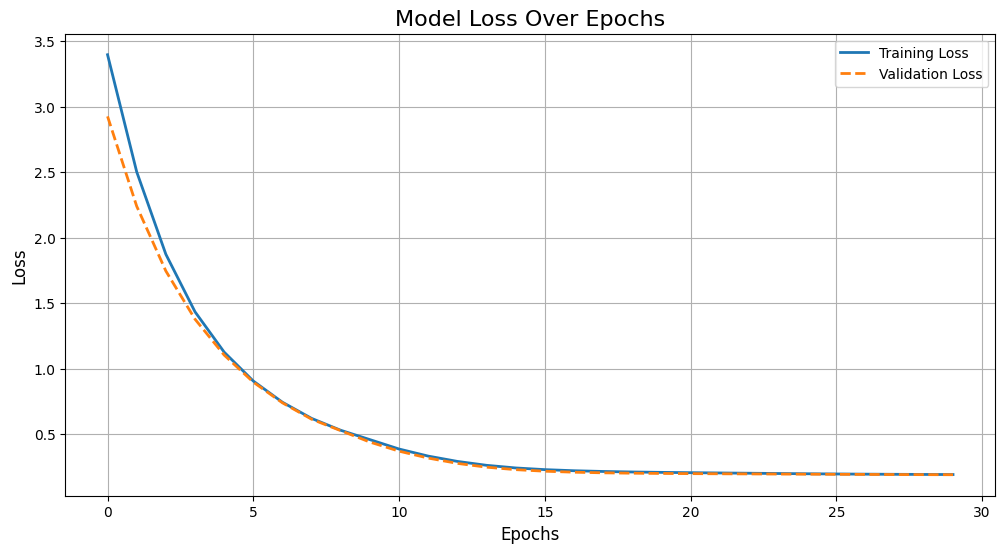

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['root_mean_squared_error'], label='Training rmse', linewidth=2)
plt.plot(history.history['val_root_mean_squared_error'], label='Validation rmse', linewidth=2, linestyle='--')
plt.title('Model root_mean_squared_error Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Root Mean Sqrd Error', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, linestyle='--')
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)
plt.show()

# Modelling Linear Regression

Simple implementation of Linear Regression using sklearn

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [35]:
model_lr = LinearRegression()

In [36]:
model_ = model_lr.fit(X_train,y_train)
y_preds = model_.predict(X_test)

In [37]:
scores = cross_val_score(model_lr, X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")

In [38]:
scores.mean()

-0.30425419730824776

# Modelling ConvLSTM with Keras

In [39]:
train_cutoff = '2017-12-26 23:59:59'  
test_start = '2018-01-10 00:00:00'    

# Ensure the index is datetime
X.index = pd.to_datetime(X.index)
y.index = pd.to_datetime(y.index)

# Split into train and test
X_train_sq = X[X.index <= train_cutoff]
y_train_sq = y[y.index <= train_cutoff]

X_test_sq = X[X.index >= test_start]
y_test_sq = y[y.index >= test_start]

In [58]:
temperature_features = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']
light_features = ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']
sound_features = ['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']

def reshape_to_convlstm_input(data, time_steps):
    num_samples = data.shape[0] - time_steps + 1
    reshaped_data = []

    for i in range(num_samples):
        temp_sequence = data.iloc[i:i + time_steps][temperature_features].values.reshape((time_steps, 2, 2, 1))
        light_sequence = data.iloc[i:i + time_steps][light_features].values.reshape((time_steps, 2, 2, 1))
        sound_sequence = data.iloc[i:i + time_steps][sound_features].values.reshape((time_steps, 2, 2, 1))
        
        combined_sequence = np.concatenate([temp_sequence, light_sequence, sound_sequence], axis=-1)
        reshaped_data.append(combined_sequence)

    return np.array(reshaped_data)

time_steps = 5
X_train_reshaped = reshape_to_convlstm_input(X_train_sq, time_steps)
y_train_reshaped = y_train_sq[time_steps - 1:]
X_test_reshaped = reshape_to_convlstm_input(X_test_sq, time_steps)
y_test_reshaped = y_test_sq[time_steps - 1:]

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense, Dropout

# Define the ConvLSTM model
convlstm_model = Sequential([
    ConvLSTM2D(filters=32, kernel_size=(2, 2), activation='relu', 
               input_shape=(time_steps, 2, 2, 3)),  # 2x2 grid with 3 channels
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),                      
    Dense(16, activation='relu'),                          #new (ctrl+f changed)
    Dense(1, activation='linear')  # For regression; use softmax/sigmoid for classification
])



convlstm_model.summary()


C:\Users\TESTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_lstm2d (ConvLSTM2D)             │ (None, 1, 1, 32)            │          18,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,225 (79.00 KB)

 Trainable params: 20,225 (79.00 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
convlstm_model.compile(optimizer='adam', loss='mse', metrics=['root_mean_squared_error'])


In [43]:
history2 = convlstm_model.fit(
    X_train_reshaped, y_train_reshaped,
    #validation_data=(X_test_reshaped, y_test_reshaped),
    validation_split = 0.2,
    epochs=150,  #might converge after a long time
    batch_size=32,
    shuffle=False
)


Epoch 1/150
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.1016 - root_mean_squared_error: 1.0214 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0511
Epoch 2/150
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5304 - root_mean_squared_error: 0.7010 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0372
Epoch 3/150
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3338 - root_mean_squared_error: 0.5563 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0407
Epoch 4/150
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2704 - root_mean_squared_error: 0.5034 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0337
Epoch 5/150
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2155 - root_mean_squared_error: 0.4533 - val_loss: 1.0029e-04 - val_root_mean_squared_error: 0.0100
Epoch 6/150
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1724 - root_mean_squared_error: 0.4048 - val_loss: 1.6653e-04 - val_root_mean_squared_error: 0.0129
Epoch 7/150
202/202 ━━━━━━━━━━━━━━━━━━

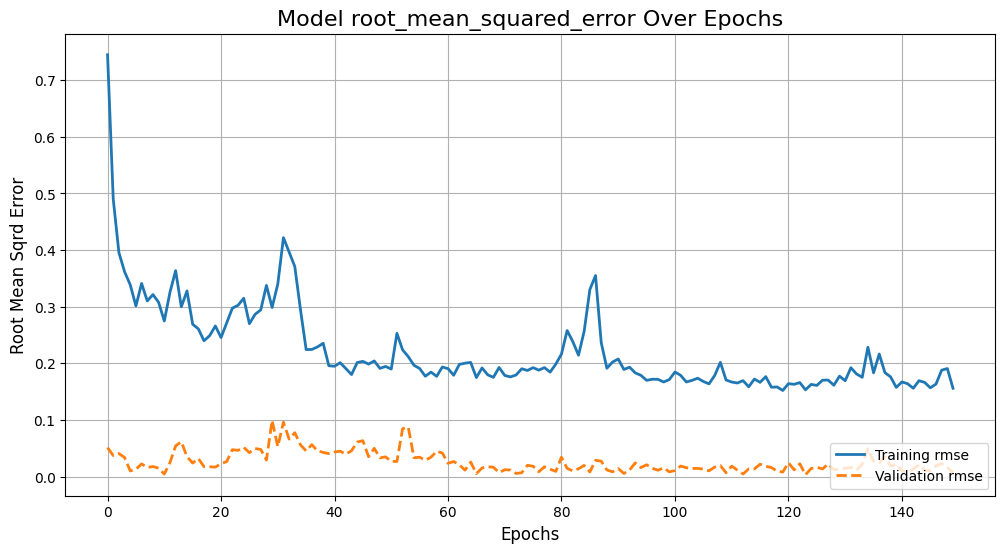

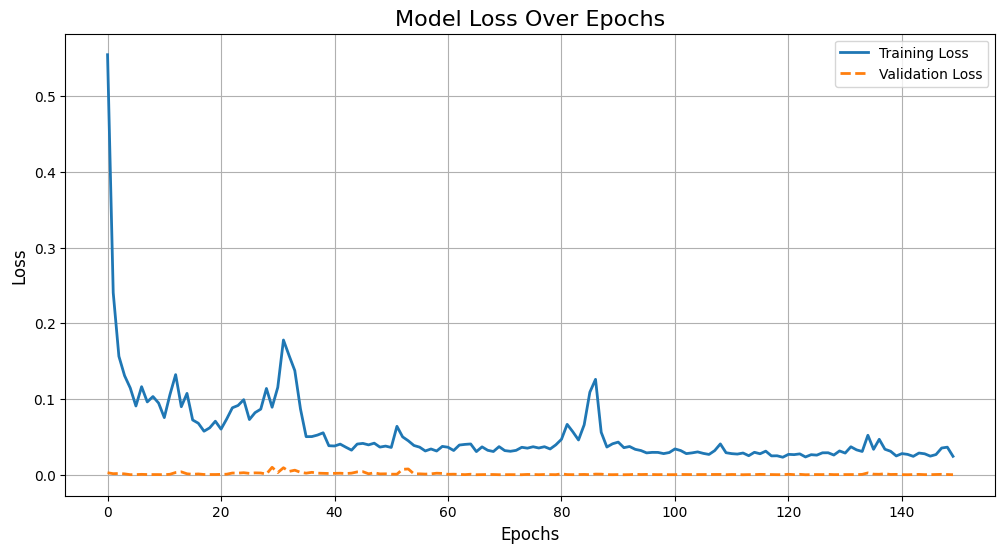

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(history2.history['root_mean_squared_error'], label='Training rmse', linewidth=2)
plt.plot(history2.history['val_root_mean_squared_error'], label='Validation rmse', linewidth=2, linestyle='--')
plt.title('Model root_mean_squared_error Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Root Mean Sqrd Error', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history2.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history2.history['val_loss'], label='Validation Loss', linewidth=2, linestyle='--')
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)
plt.show()

Various reasons could lead to this, low ammount of data as well with the large gap I saw previously, data before and after the gap may not have a meaningful temporal connection

The split might end up including data from both sides of the gap, introducing an artificial sense of continuity in the validation process.

UPDATE: To tackle this issue, decided to change the splitting of data to be on the gap, so validation/test would be just the two days outside the larger group of data, therefore retaining temporal sctructure accross each split in data, by doing this actually found out that the second part of the data doesn't actually have the same patterns portraid in them.
The main hypothesis is that the second batch of temporal data has Temporal Discontinuity relative to the first batch seen in the original data

## Future Notes

After observing the change in performance from the way in which the split is done to address the interval in the data, it would be great to visualize and compare the distributions present in the features on both subsets of data